In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

# Functions

## Visualizing results

In [2]:
def display_three_axes(df, y, x=None, title=None, x_label=None, y_label=None, filename=None):
    """ Function for visualization of three axes (X, Y, Z) of the measurement results of the device
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis (for the three lines, this is the same data)
        3) y - the list containing the dataframe column names corresponding to the OX, OY, and OZ axis measurements, respectively
        4) title - title of the graph
        5) x_label - the name of the OX axis of the graph
        6) y_label - the name of the OY axis of the graph
        7) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        Nothing, but plots graph
    """
    plt.figure(figsize=(12, 6))
    if x is None:
        plt.plot(df[y[0]], label='X')
        plt.plot(df[y[1]], label='Y')
        plt.plot(df[y[2]], label='Z')
    else:
        plt.plot(df[x], df[y[0]], label='X')
        plt.plot(df[x], df[y[1]], label='Y')
        plt.plot(df[x], df[y[2]], label='Z')
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## Data Filtering

In [15]:
def display_raw_filtered_data_zoom(df, x, y, x_lims, y_lims, title=None, x_label=None, y_label=None, filename=None, zoom_axes=None):
    """ Function to display raw and filtered data on the same graph with scaling to better display the filtering
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis of the graph
        3) y - the list containing the column names of the data frame corresponding to the raw and filtered data, respectively, on a given axis (OX, OY, or OZ)
        4) x_lims - the list of limits along the OX axis for zooming ([zoom_xmin; zoom_xmax])
        5) y_lims - the list of limits along the OY axis for zooming ([zoom_ymin; zoom_ymax])
        6) title - title of the graph
        7) x_label - the name of the OX axis of the graph
        8) y_label - the name of the OY axis of the graph
        9) filename - filename under which to save the graph in the project folder
        10) zoom_axes - the list containing the placement coordinates (x, y) and dimensions (width, height) of the smaller graph that contains the zoomed-in image for the specified limits (x_lims and y_lims)
            zoom_axes = [x, y, width, height] 
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # inset
    if zoom_axes:
        inset_ax = fig.add_axes(zoom_axes)
    else:
        inset_ax = fig.add_axes([0.25, 0.20, 0.20, 0.20])
    inset_ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    inset_ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    inset_ax.set_xlim(x_lims[0], x_lims[1])
    inset_ax.set_ylim(y_lims[0], y_lims[1])
    inset_ax.set_title('zoom near origin')
    if filename:
        plt.savefig(f"graphs/{filename}.png", bbox_inches='tight')
    plt.show()

In [16]:
def get_statistical_measures_df(df, df_data_columns, functions, result_df_columns):
    """A function to create a dataframe that contains calculated statistical parameters for the specified columns of the original dataframe
    Args:
        1) df - the original dataframe that contains the required data
        2) df_data_columns - a list of column names of the original dataframe for which to find statistical measures
        3) functions - a list of references to numpy functions that will calculate the required statistical measures
        4) result_df_columns - a list of names of the columns of the output dataframe, in which the names of the searched statistical measures are specified
    
    An example of using the function:
        Let's imagine that we have a dataframe data_df, which contains the columns 'time' (time of measurement), 'accelX', 'accelY', 'accelZ' (the results of measuring the readings of the accelerometer on the corresponding axes). 
        We want to calculate the statistical mean and standard deviation for the accelerometer readings on all three axes (the columns 'accelX', 'accelY', 'accelZ' of data_df), so the columns of the output dataframe will be named, for example, 'mean' and 'std'. 
        These values ​​can be calculated using the numpy library functions: np.mean and np.std.
        So, the function call will look like this:
        get_statistical_measures_df(df=data_df, 
                                    df_data_columns=['accelX', 'accelY', 'accelZ'], 
                                    functions=[np.mean, np.std], 
                                    result_df_columns=['mean', 'std'])
    """
    statistical_measures_dict = {}
    for key in result_df_columns:
        statistical_measures_dict[key] = []
        
    statistical_measures_dict['data'] = df_data_columns
    
    for [function, res_column] in zip(functions, result_df_columns):
        # Go through all df columns and find statistical measures for it
        for df_data_column in df_data_columns:
            statistical_measures_dict[res_column].append(function(df[df_data_column].values))
    
    # Create DataFrame
    statistical_measures_df = pd.DataFrame.from_dict(statistical_measures_dict)
    statistical_measures_df = statistical_measures_df.set_index('data')
    return statistical_measures_df

## Exploratory Data Analysis

In [48]:
def display_pie_chart(df, column_name, title=None, filename=None):
    """ Function to display the percentage ratio of column (with the name column_name) content 
    Args:
        1) df - the original dataframe that contains the required information
        2) column_name - the name of the df dataframe column whose percentage values are to be found
        3) title - the title of the graph
        4) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None, but plots graph
    """
    # Calculate the percentage of each activity in original_df
    activity_percentages_df = df[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    plt.pie(activity_percentages_df, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

# Work with train data

In [3]:
df = pd.read_csv('data/40_Hz/concatenated_data/All/Train_activities_1_2023-08-23.csv')
df.head()

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity
0,1692440406933,0.000,0.14895,-0.06000,9.775050,0.106150,-0.018975,-1.117325,No activity
1,1692440406976,0.043,-0.05400,0.04200,9.748950,0.110550,-0.163075,-1.241488,No activity
2,1692440407003,0.070,0.23295,-0.12405,9.739051,0.096937,-0.311437,-1.159812,No activity
3,1692440407037,0.104,-0.18495,-0.01200,9.691051,0.079475,-0.309375,-0.900900,No activity
4,1692440407057,0.124,-0.46305,0.13605,10.146001,0.065037,-0.293013,-0.771787,No activity


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63529 entries, 0 to 63528
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  63529 non-null  int64  
 1   time       63529 non-null  float64
 2   accX       63529 non-null  float64
 3   accY       63529 non-null  float64
 4   accZ       63529 non-null  float64
 5   gyrX       63529 non-null  float64
 6   gyrY       63529 non-null  float64
 7   gyrZ       63529 non-null  float64
 8   activity   63529 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.4+ MB


In [5]:
time_diffs = df['time'].diff()
freq = 1.0 / time_diffs.mean()
print(f"Measurement time = {df.iloc[-1]['time'] - df.iloc[0]['time']} s")
print(f"Number of measurements (number of rows in the data set) = {len(df)}")
print(f"Frequency of measurement = {freq} Hz")

Measurement time = 1852.281 s
Number of measurements (number of rows in the data set) = 63529
Frequency of measurement = 34.29717197336689 Hz


## Data Cleaning and Preprocessing

### We execute the following steps based on the observation:
- drop null values.
- drop the rows where the time is less than 0.
- sort data in ascending order of time if it has not been sorted.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63529 entries, 0 to 63528
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  63529 non-null  int64  
 1   time       63529 non-null  float64
 2   accX       63529 non-null  float64
 3   accY       63529 non-null  float64
 4   accZ       63529 non-null  float64
 5   gyrX       63529 non-null  float64
 6   gyrY       63529 non-null  float64
 7   gyrZ       63529 non-null  float64
 8   activity   63529 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 4.4+ MB


In [9]:
len(df[df['time']<0])

0

In [10]:
# Check if the 'time' column of the dataframe is sorted in ascending order
df['time'].is_monotonic_increasing

True

## Data Filtering

### Display data before filtering

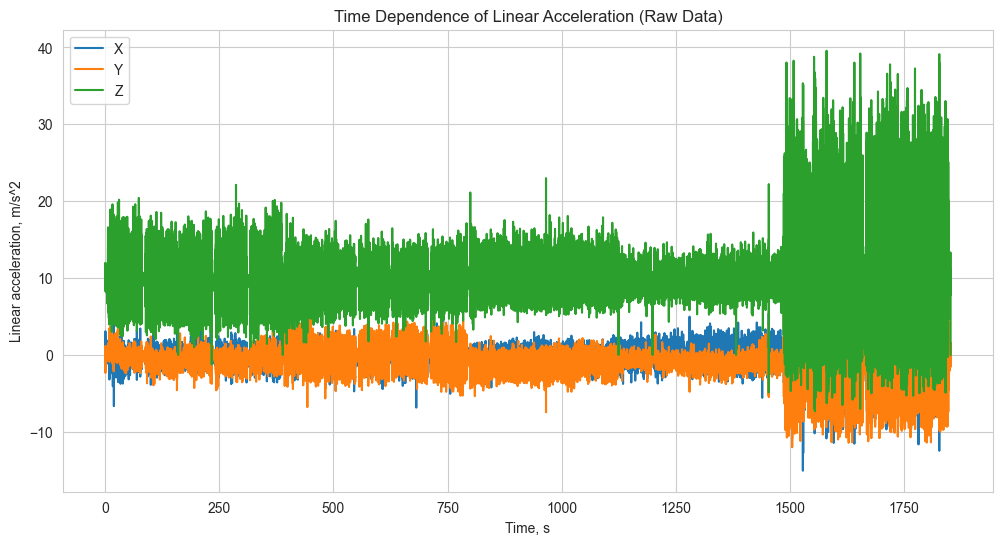

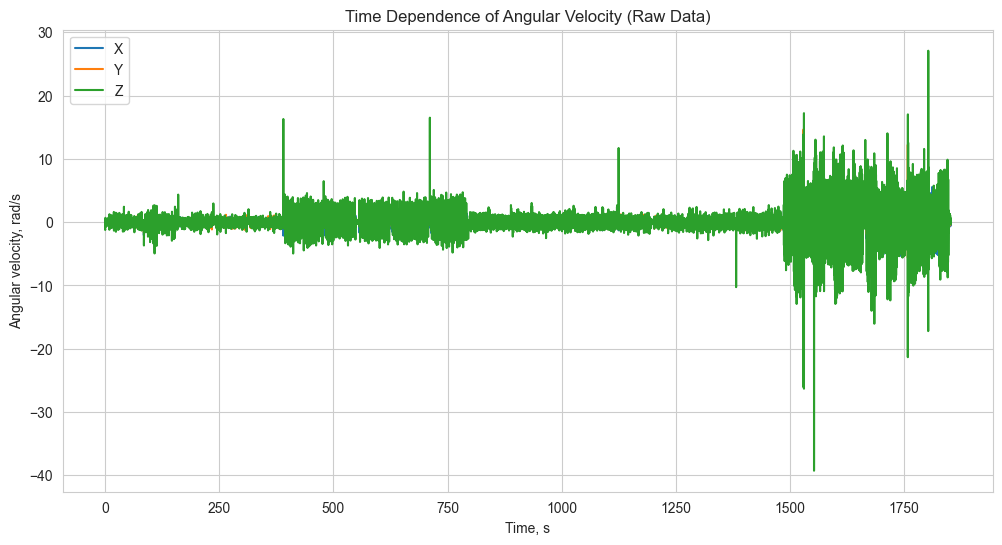

In [13]:
display_three_axes(df=df, x='time', y=['accX', 'accY', 'accZ'], title='Time Dependence of Linear Acceleration (Raw Data)', 
                   x_label='Time, s', y_label='Linear acceleration, m/s^2')
display_three_axes(df=df, x='time', y=['gyrX', 'gyrY', 'gyrZ'], title='Time Dependence of Angular Velocity (Raw Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s')

### Display data after filtering

In [14]:
window_size = 10  # Define the size of the median window

# Apply median filtering to accelerometer data
df['accX_filtered'] = df['accX'].rolling(window=window_size, center=True, min_periods=1).median()
df['accY_filtered'] = df['accY'].rolling(window=window_size, center=True, min_periods=1).median()
df['accZ_filtered'] = df['accZ'].rolling(window=window_size, center=True, min_periods=1).median()

# Apply median filtering to gyroscope data
df['gyrX_filtered'] = df['gyrX'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrY_filtered'] = df['gyrY'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrZ_filtered'] = df['gyrZ'].rolling(window=window_size, center=True, min_periods=1).median()

df.head(3)

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity,accX_filtered,accY_filtered,accZ_filtered,gyrX_filtered,gyrY_filtered,gyrZ_filtered
0,1692440406933,0.000,0.14895,-0.06000,9.775050,0.106150,-0.018975,-1.117325,No activity,-0.054,-0.012,9.74895,0.096937,-0.293013,-1.117325
1,1692440406976,0.043,-0.05400,0.04200,9.748950,0.110550,-0.163075,-1.241488,No activity,-0.072,0.015,9.76200,0.088206,-0.277956,-1.009113
2,1692440407003,0.070,0.23295,-0.12405,9.739051,0.096937,-0.311437,-1.159812,No activity,-0.054,-0.012,9.77505,0.079475,-0.262900,-0.900900


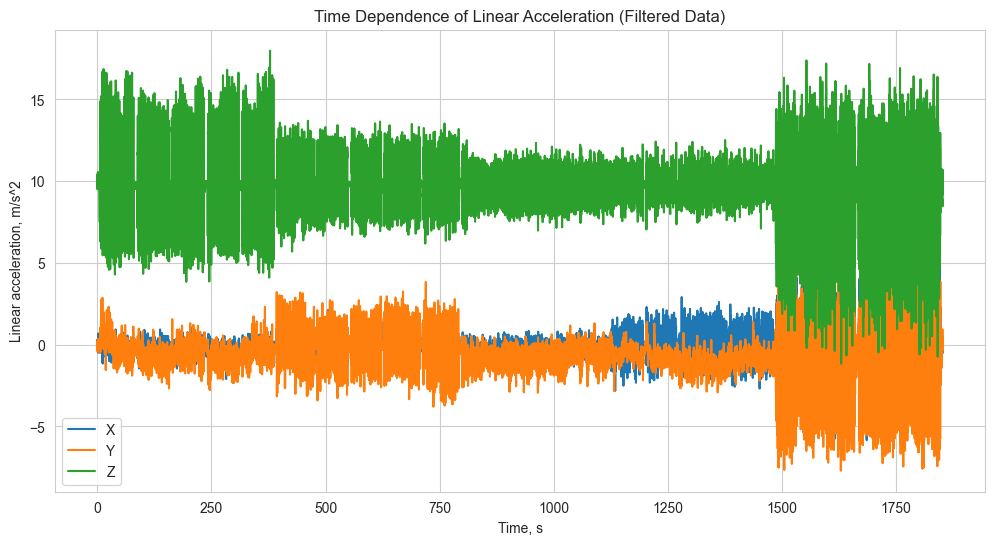

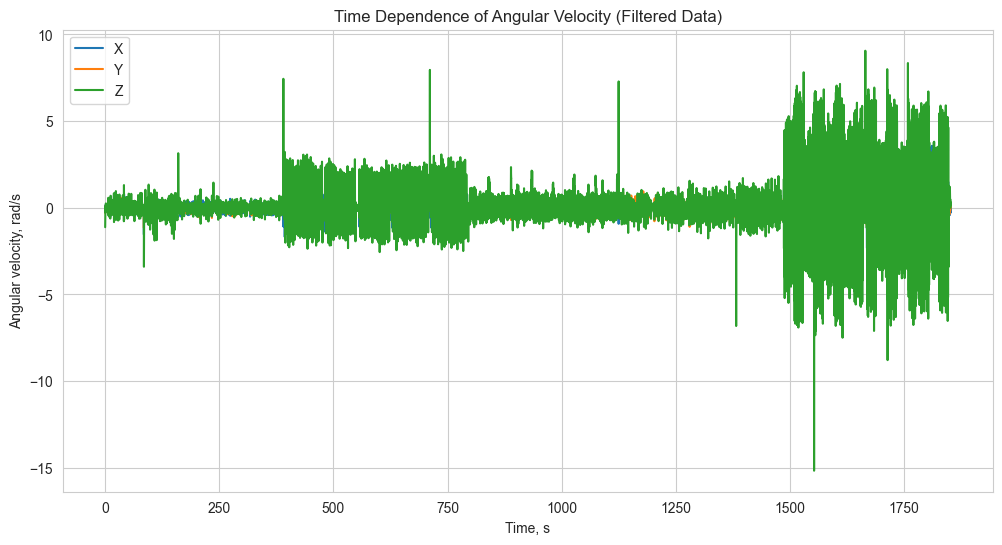

In [17]:
display_three_axes(df=df, x='time', y=['accX_filtered', 'accY_filtered', 'accZ_filtered'], title='Time Dependence of Linear Acceleration (Filtered Data)', 
                x_label='Time, s', y_label='Linear acceleration, m/s^2')
display_three_axes(df=df, x='time', y=['gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered'], title='Time Dependence of Angular Velocity (Filtered Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s')

### Consider the implications of data filtering

#### Display the results of filtering for accelerometer and gyroscope

##### Zoom accelerometer graphs to better see the results of filtering

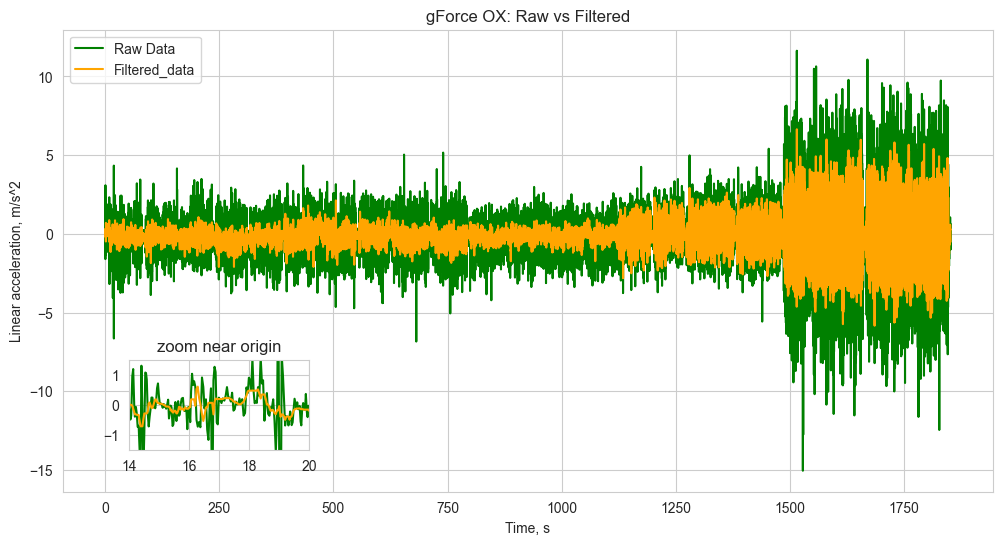

In [22]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accX', 'accX_filtered'], x_lims=[14, 20], y_lims=[-1.5, 1.5],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

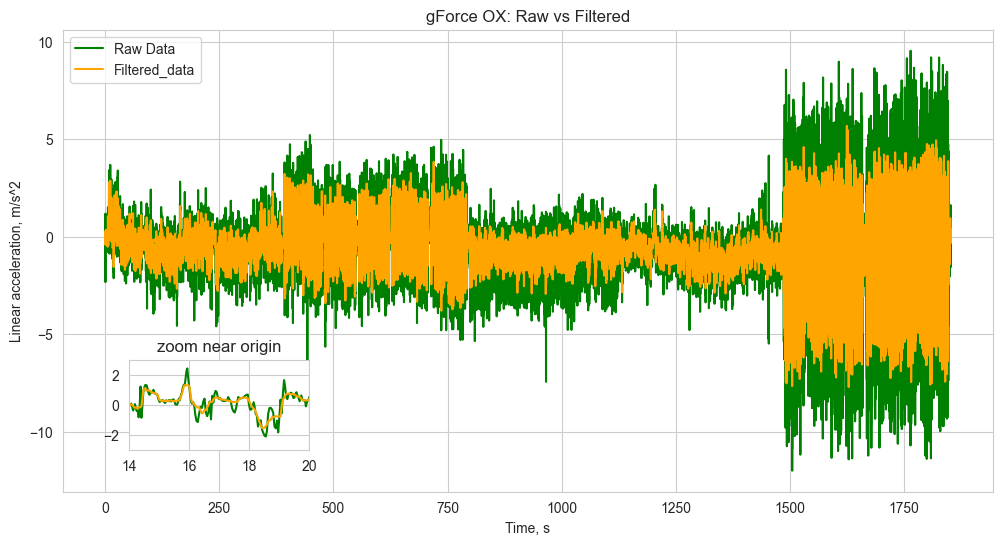

In [23]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accY', 'accY_filtered'], x_lims=[14, 20], y_lims=[-3, 3],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

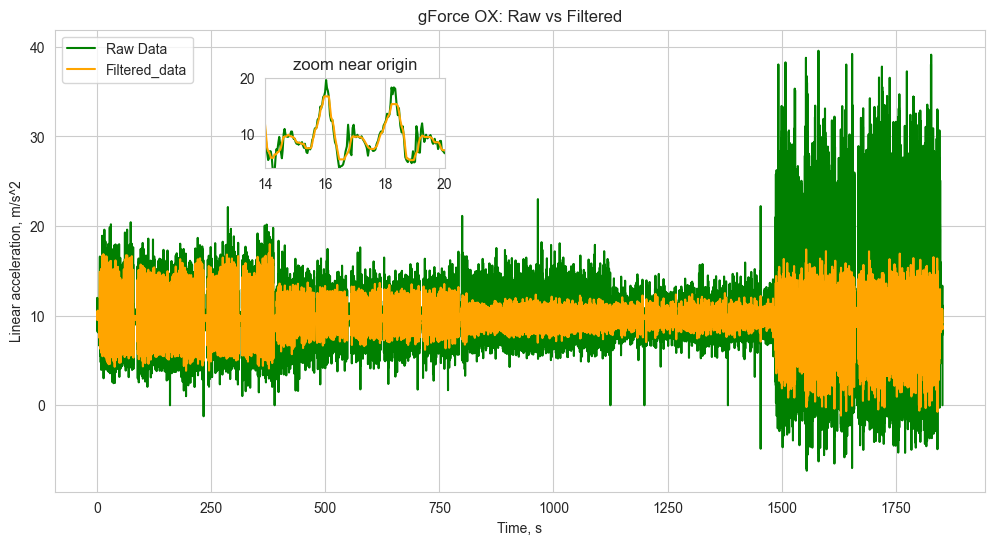

In [29]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accZ', 'accZ_filtered'], x_lims=[14, 20], y_lims=[4, 20],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.30, 0.65, 0.15, 0.15])

##### Zoom gyroscope graphs to better see the results of filtering

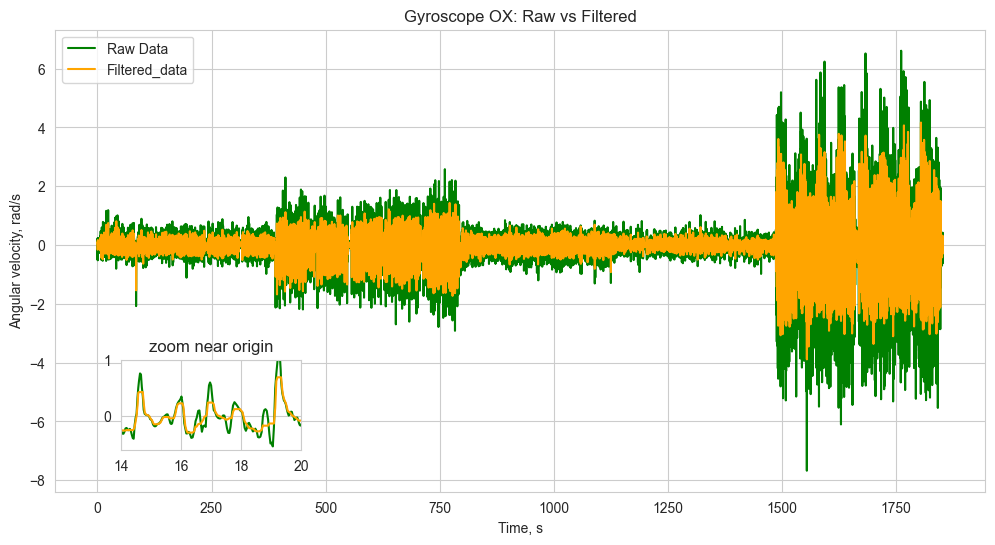

In [36]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrX', 'gyrX_filtered'], x_lims=[14, 20], y_lims = [-0.6, 1],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

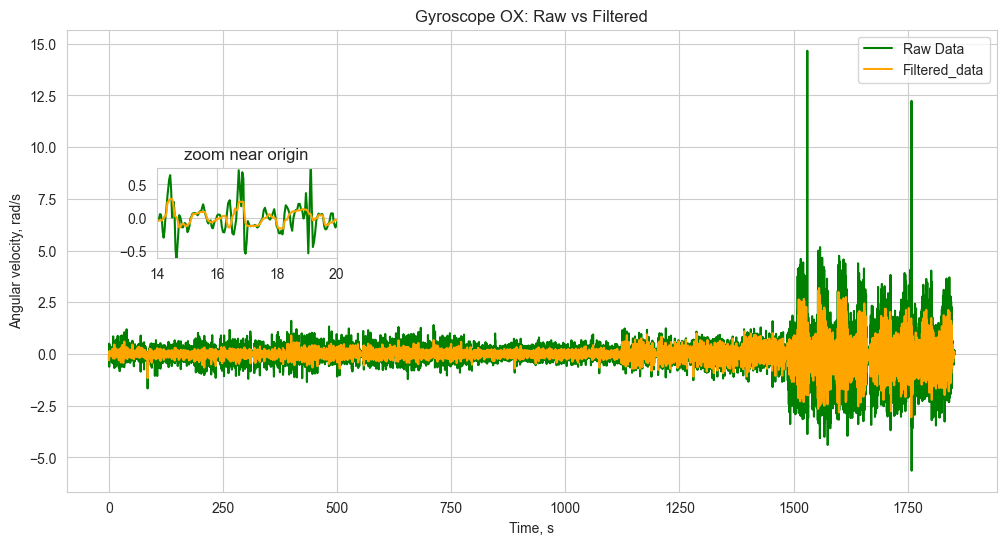

In [42]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrY', 'gyrY_filtered'], x_lims=[14, 20], y_lims = [-0.6, 0.75],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.20, 0.50, 0.15, 0.15])

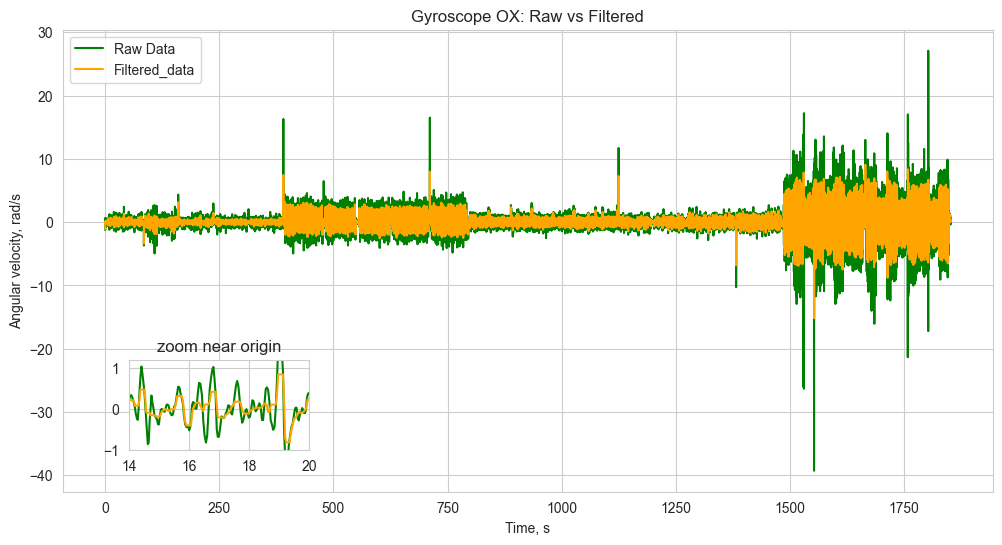

In [46]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrZ', 'gyrZ_filtered'], x_lims=[14, 20], y_lims = [-1, 1.2],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

## Exploratory Data Analysis

### Analyzing class label distribution

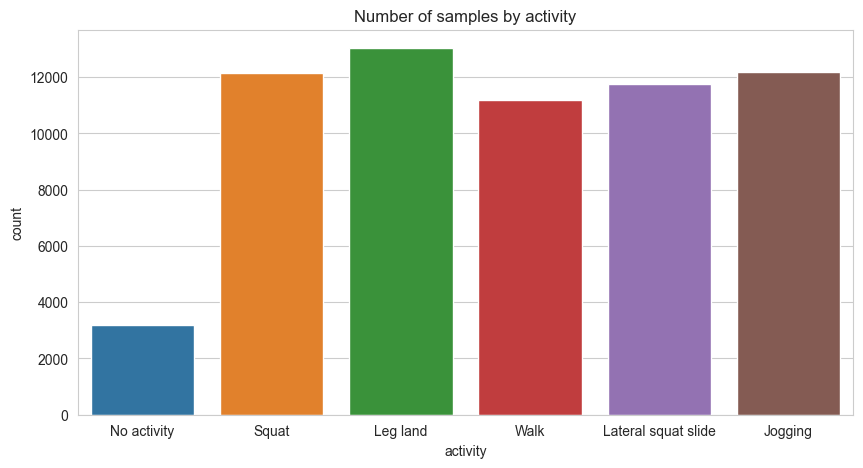

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

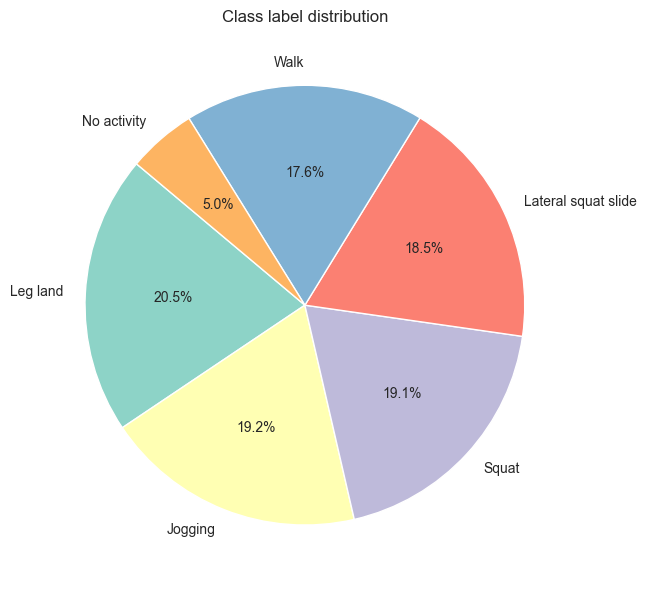

In [49]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

#### Remove 'No activity' class ('activity' column) from df 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63529 entries, 0 to 63528
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      63529 non-null  int64  
 1   time           63529 non-null  float64
 2   accX           63529 non-null  float64
 3   accY           63529 non-null  float64
 4   accZ           63529 non-null  float64
 5   gyrX           63529 non-null  float64
 6   gyrY           63529 non-null  float64
 7   gyrZ           63529 non-null  float64
 8   activity       63529 non-null  object 
 9   accX_filtered  63529 non-null  float64
 10  accY_filtered  63529 non-null  float64
 11  accZ_filtered  63529 non-null  float64
 12  gyrX_filtered  63529 non-null  float64
 13  gyrY_filtered  63529 non-null  float64
 14  gyrZ_filtered  63529 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 7.3+ MB


In [51]:
df = df[df['activity'] != 'No activity']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60323 entries, 164 to 63380
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      60323 non-null  int64  
 1   time           60323 non-null  float64
 2   accX           60323 non-null  float64
 3   accY           60323 non-null  float64
 4   accZ           60323 non-null  float64
 5   gyrX           60323 non-null  float64
 6   gyrY           60323 non-null  float64
 7   gyrZ           60323 non-null  float64
 8   activity       60323 non-null  object 
 9   accX_filtered  60323 non-null  float64
 10  accY_filtered  60323 non-null  float64
 11  accZ_filtered  60323 non-null  float64
 12  gyrX_filtered  60323 non-null  float64
 13  gyrY_filtered  60323 non-null  float64
 14  gyrZ_filtered  60323 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 7.4+ MB


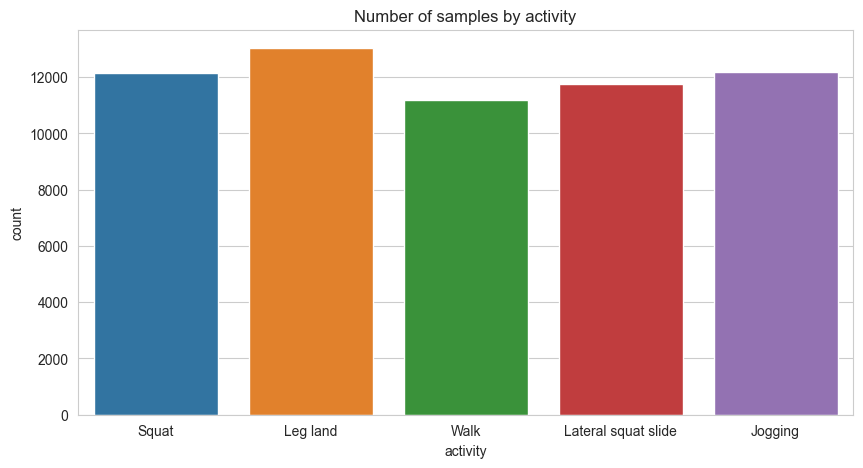

In [54]:
plt.rcdefaults()
sns.set_style('whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

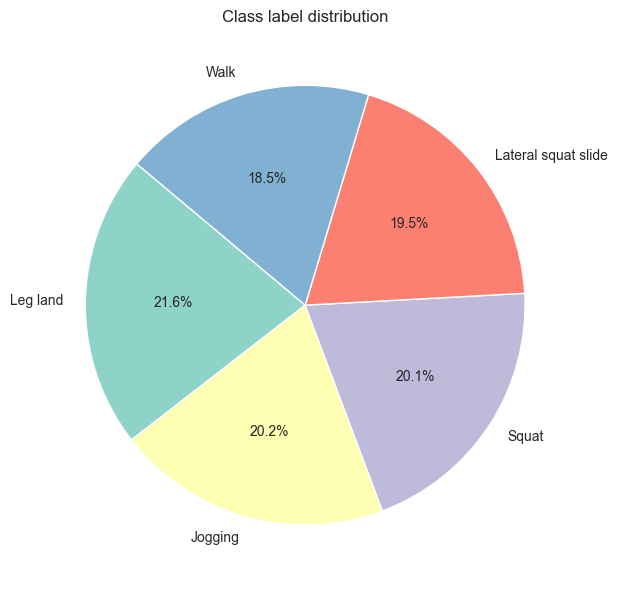

In [55]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

In [74]:
len(undersampled_df[undersampled_df['activity'] == 'Walk'])

11188

### Perform undersampling to get a balanced dataframe

In [68]:
# First, calculate the minimum number of samples across all classes
min_samples = df['activity'].value_counts().min()


# Initialize an empty DataFrame to store the undersampled data
undersampled_df = pd.DataFrame()

# Loop through each unique activity class and select the first min_samples for each class
for activity_class in df['activity'].unique():
    class_subset = df[df['activity'] == activity_class].iloc[:min_samples]
    undersampled_df = pd.concat([undersampled_df, class_subset])

undersampled_df.head()

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity,accX_filtered,accY_filtered,accZ_filtered,gyrX_filtered,gyrY_filtered,gyrZ_filtered
164,1692440411707,4.774,0.23505,-0.31605,9.904051,0.025163,-0.023512,0.005775,Squat,0.054000,-0.265500,9.780525,-0.000206,-0.013887,0.006806
165,1692440411742,4.809,0.35205,-0.33705,9.555000,0.024750,-0.048262,-0.113300,Squat,0.065025,-0.265500,9.644026,0.003781,-0.035888,-0.039119
166,1692440411776,4.843,0.13905,-0.28695,9.495001,0.015950,-0.065312,-0.138325,Squat,0.065025,-0.265500,9.564001,0.007631,-0.036575,-0.071913
167,1692440411806,4.873,0.05295,-0.21795,9.571051,-0.002200,-0.095425,-0.111925,Squat,0.065025,-0.301500,9.564001,0.010519,-0.036575,-0.071913
168,1692440411837,4.904,0.03105,-0.16200,9.057000,-0.000963,-0.077825,-0.084425,Squat,0.107025,-0.323025,9.555975,0.010519,-0.036575,-0.071913


In [80]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55940 entries, 164 to 62372
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      55940 non-null  int64  
 1   time           55940 non-null  float64
 2   accX           55940 non-null  float64
 3   accY           55940 non-null  float64
 4   accZ           55940 non-null  float64
 5   gyrX           55940 non-null  float64
 6   gyrY           55940 non-null  float64
 7   gyrZ           55940 non-null  float64
 8   activity       55940 non-null  object 
 9   accX_filtered  55940 non-null  float64
 10  accY_filtered  55940 non-null  float64
 11  accZ_filtered  55940 non-null  float64
 12  gyrX_filtered  55940 non-null  float64
 13  gyrY_filtered  55940 non-null  float64
 14  gyrZ_filtered  55940 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 6.8+ MB


#### View the labels distribution after undersampling

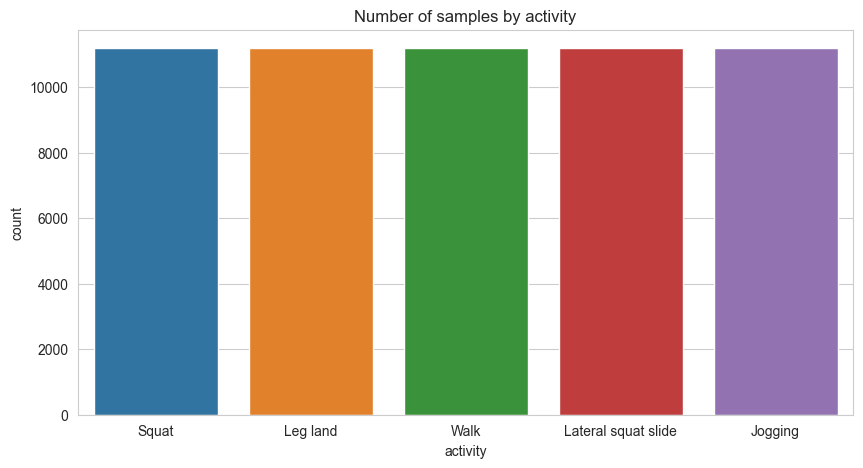

In [76]:
plt.rcdefaults()
sns.set_style('whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=undersampled_df, x='activity')
plt.title('Number of samples by activity')
plt.show()

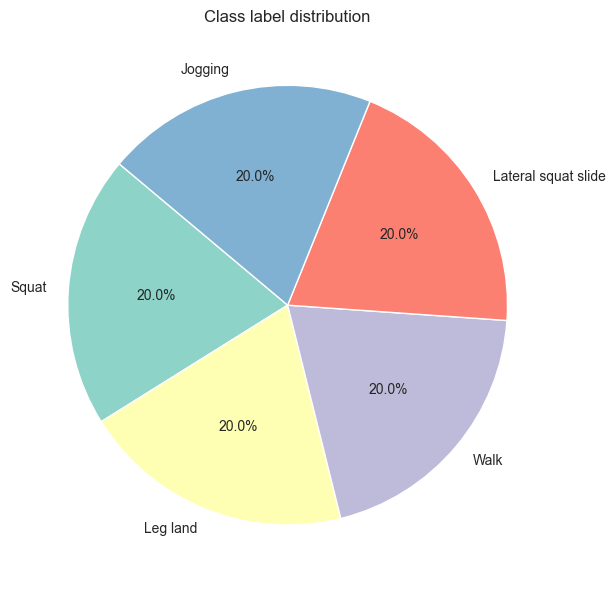

In [77]:
display_pie_chart(df=undersampled_df, column_name='activity', title='Class label distribution')